In [12]:
import numpy as np
import matplotlib.pyplot as plt
from essential import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input
from tensorflow.nn import softmax

In [13]:
X, y = load_mnist_data()
X_train, y_train, X_test, y_test = test_train_split(X, y, splitting_ratio=0.8)
X_train, X_test = normalize(X_train, X_test)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

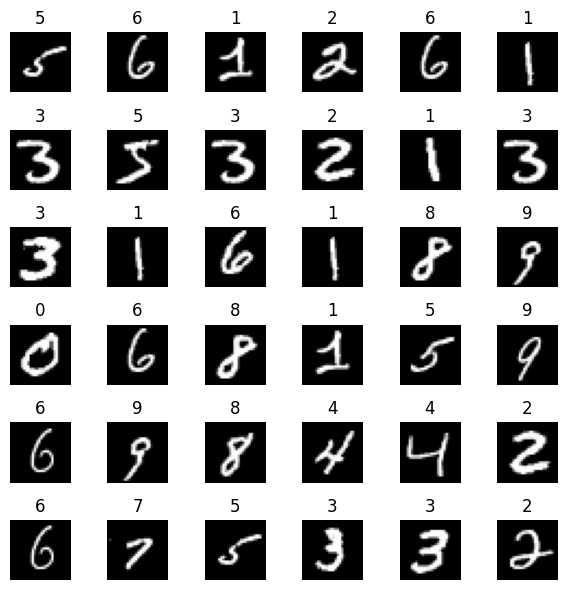

In [15]:
# random images from the dataset
displayImages(X_train[:36], y_train[:36], grid_size=6)

In [16]:
model = Sequential(
    [
        Input(shape=(784,), name='InputLayer'),
        Dense(25, activation='relu', name='L1'),
        Dense(15, activation='relu', name='L2'),
        Dense(10, activation='linear', name='L3'), # linear in order to benifit from logits
    ], name='softmax_10class_classifier'
)
model.summary()

Model: "softmax_10class_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
[L1, L2, L3] = model.layers
W1, b1 = L1.get_weights()
W2, b2 = L2.get_weights()
W3, b3 = L3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [18]:
model.compile(
    optimizer=Adam(1e-4),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5505 - loss: 1.4298
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8720 - loss: 0.4556
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8939 - loss: 0.3641
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9047 - loss: 0.3289
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9130 - loss: 0.2979
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9161 - loss: 0.2923
Epoch 7/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9204 - loss: 0.2738
Epoch 8/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9244 - loss: 0.2575
Epoch 9/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9294 - loss: 0.2414
Epoch 10/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9279 - loss: 0.2450
Epoch 11/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9327 - loss: 0.2319
Epoch 12/50
1750/1750 ━━━━━━━━

In [19]:
print(f"W1 = {W1}, b1 = {b1}")
print(f"W2 = {W2}, b2 = {b2}")
print(f"W3 = {W3}, b3 = {b3}")

W1 = [[ 0.05853181 -0.00599596 -0.01465333 ... -0.06426577  0.04861398
  -0.03453855]
 [ 0.07645956  0.03109659 -0.08096531 ... -0.05171742  0.02985483
   0.05502173]
 [-0.02998868  0.01426519 -0.08295657 ...  0.02619319 -0.02722706
   0.03640305]
 ...
 [-0.0776758  -0.03701401 -0.06563165 ...  0.05637567  0.02476025
  -0.01516958]
 [ 0.07570757  0.0836481  -0.02418724 ... -0.05115974 -0.00587595
  -0.02616426]
 [-0.02933061 -0.0566702   0.00962101 ... -0.00018358 -0.02897191
   0.04300018]], b1 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
W2 = [[ 3.33381653e-01  3.48691165e-01 -1.58987373e-01  2.84270167e-01
  -2.77303159e-01 -1.13218725e-02 -2.87041962e-01  1.38813019e-01
  -3.24503779e-01 -1.99830353e-01 -1.91082507e-01 -1.57781884e-01
   9.39655006e-02  2.54592597e-01  6.47789538e-02]
 [ 1.00492567e-01  2.39782274e-01 -8.87483358e-02 -3.59313130e-01
  -2.20222801e-01 -2.86622584e-01 -1.95214137e-01 -3.21150571e-01
  -1.83822080e-01 -3.69040668e-02

In [20]:
pred = model.predict(X_test)
pred = softmax(pred)
predictions = np.zeros(pred.shape[0])

for i in range(pred.shape[0]):
    predictions[i] = np.argmax(pred[i])

predictions = predictions.astype(int)
accuracy = np.mean(predictions == y_test)
print(accuracy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step
0.9592142857142857


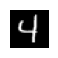

Probability Distribution : [4.2184161e-06 3.5287837e-09 4.1050425e-06 3.4822951e-05 9.9847347e-01
 1.1991156e-06 1.3747102e-06 1.1219304e-03 2.3395570e-07 3.5879883e-04]
Prediction : 4, Label : 4


In [21]:
random_index = np.random.randint(0, y_test.shape[0])
displayImage(X_test[random_index].reshape((1,784)))
print(f"Probability Distribution : {pred[random_index]}")
print(f"Prediction : {predictions[random_index]}, Label : {y_test[random_index]}")

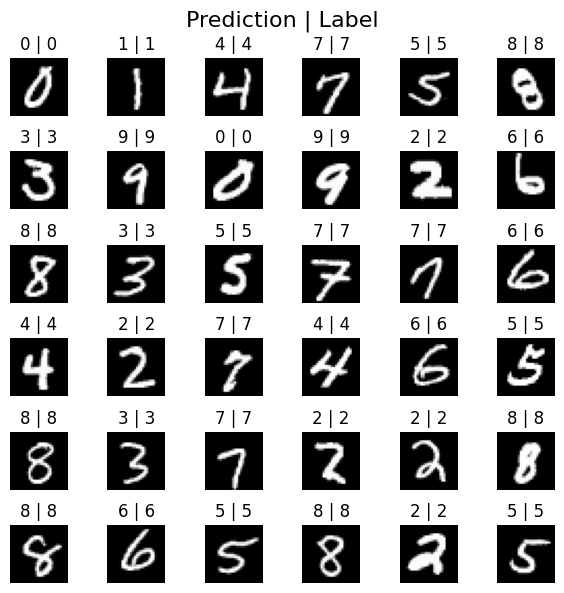

In [22]:
# display random images from the test set along with their predictions in a square grid
displayPredictions(X_test, y_test, predictions, grid_size=6)

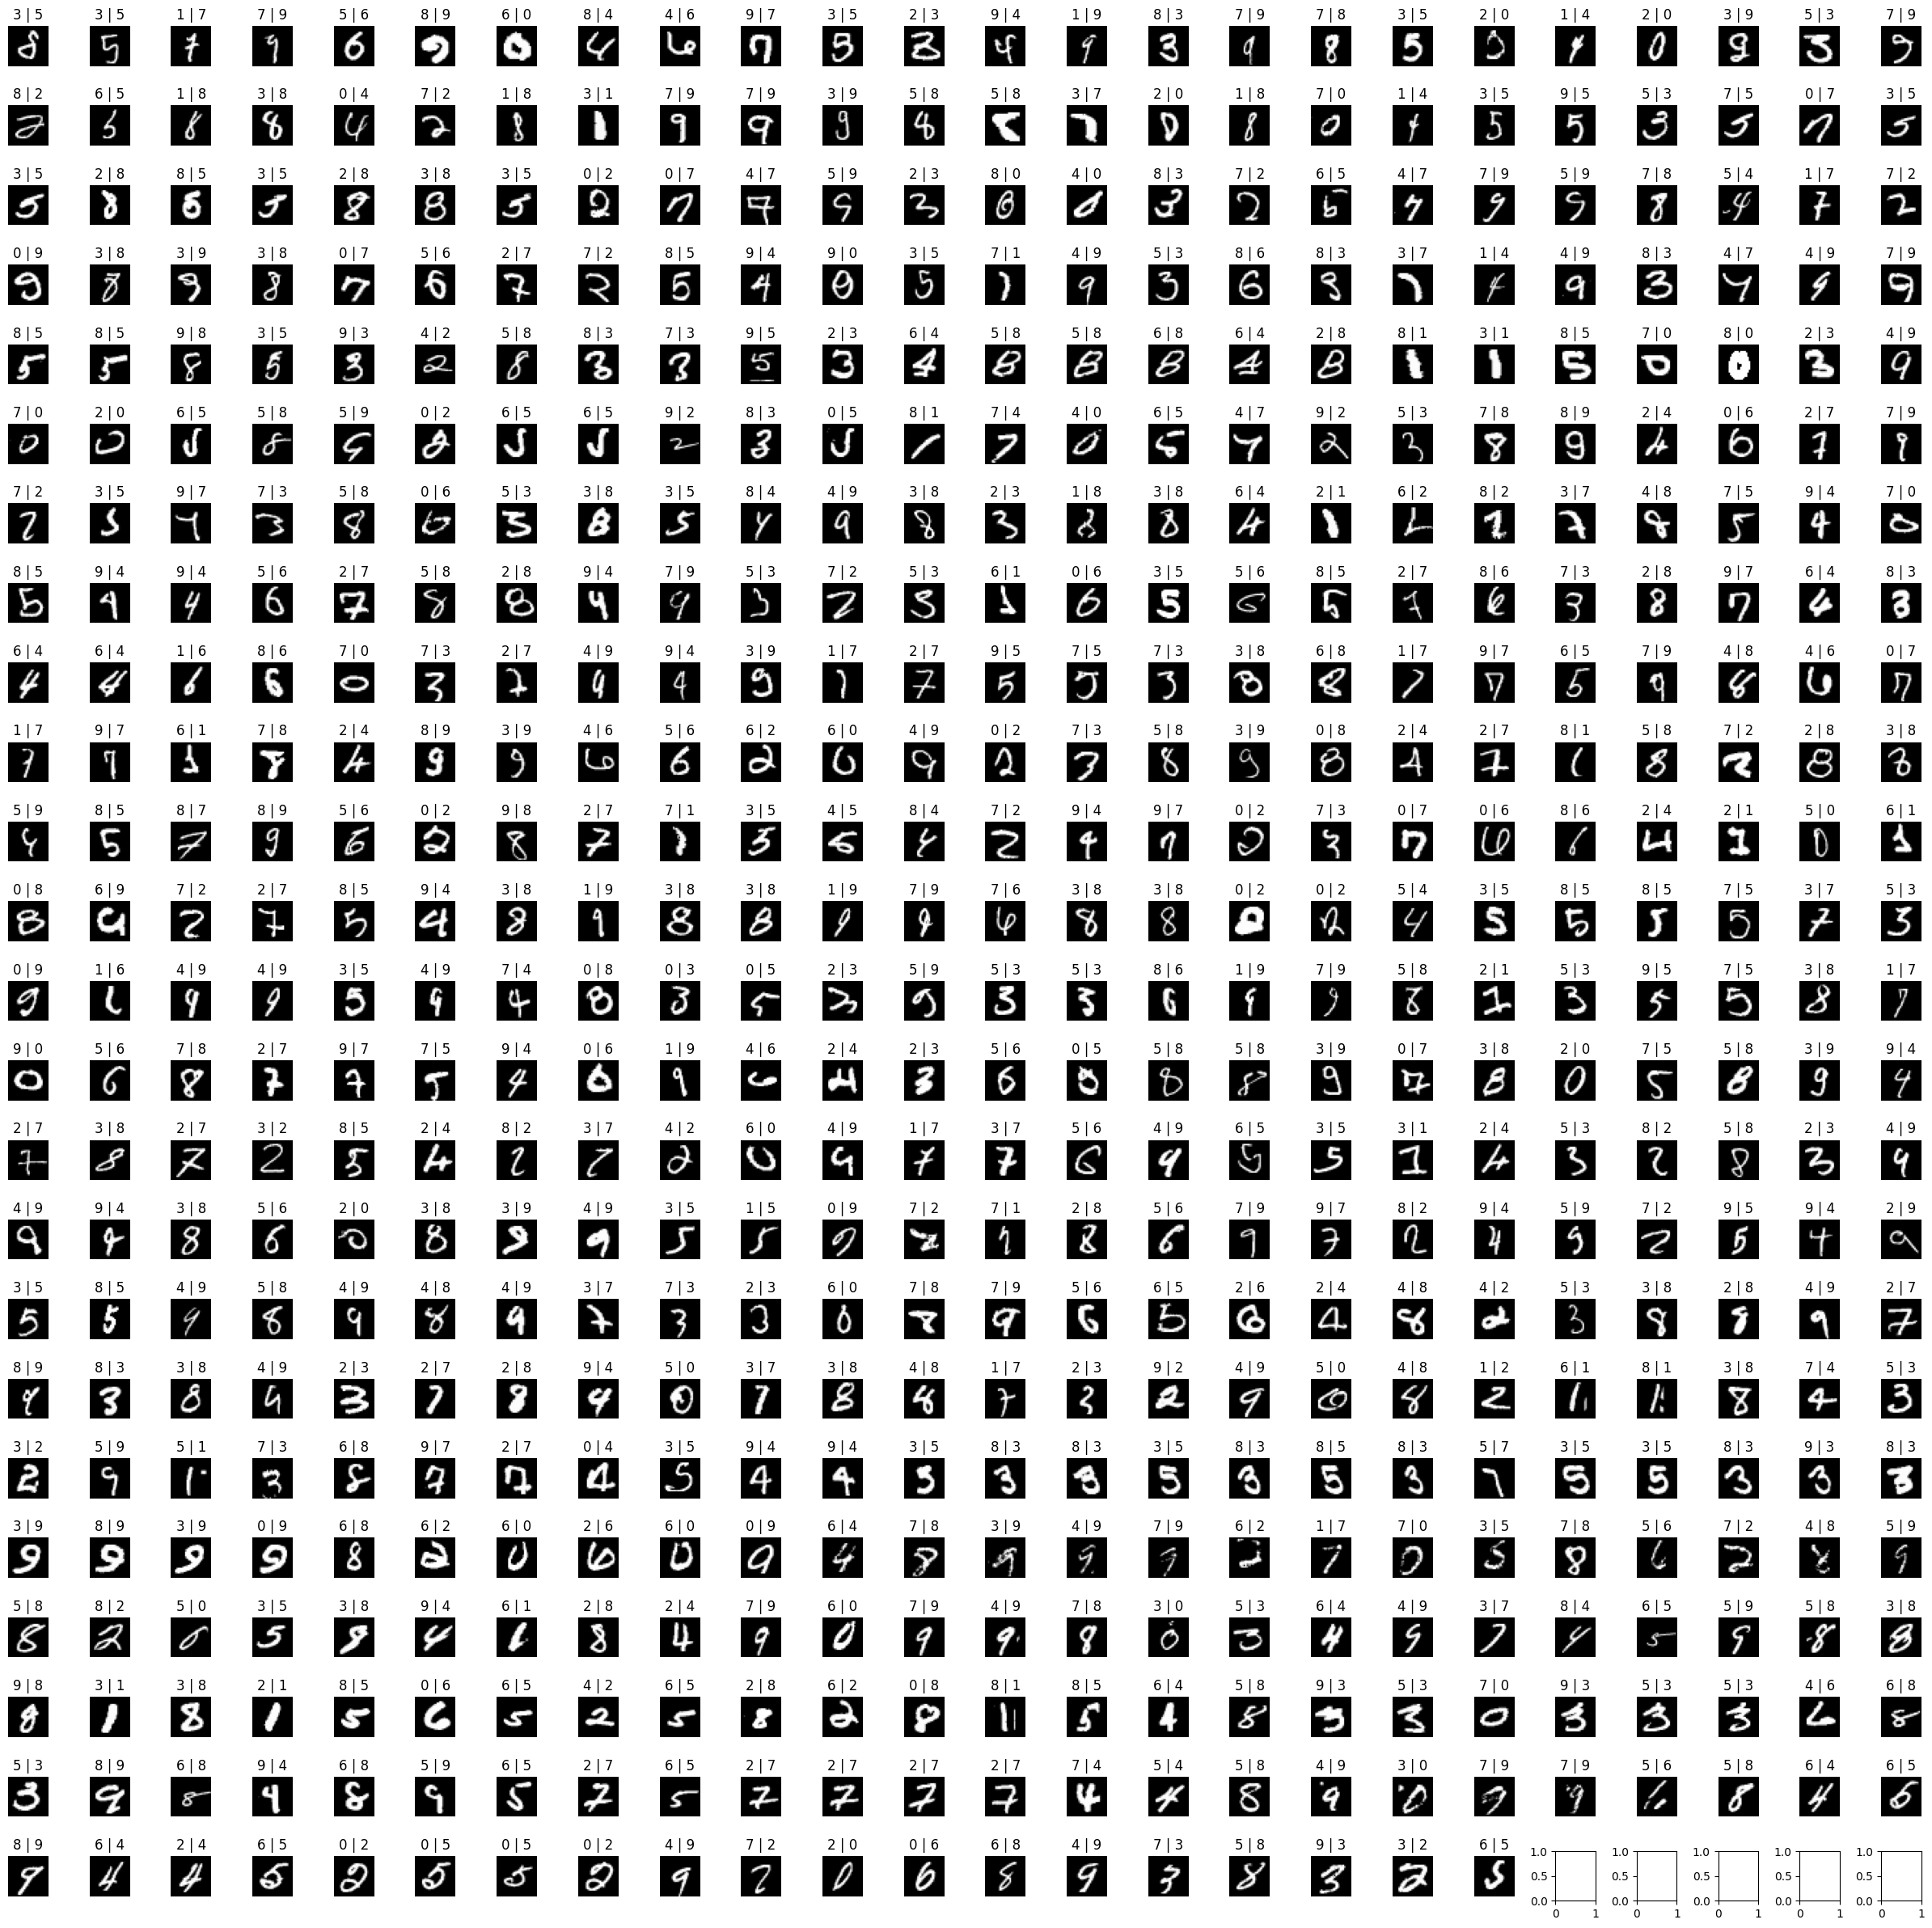

Total errors: 571 out of 14000


In [23]:
# display errors in the predictions across the test set

DisplayErrors(X_test, y_test, predictions)

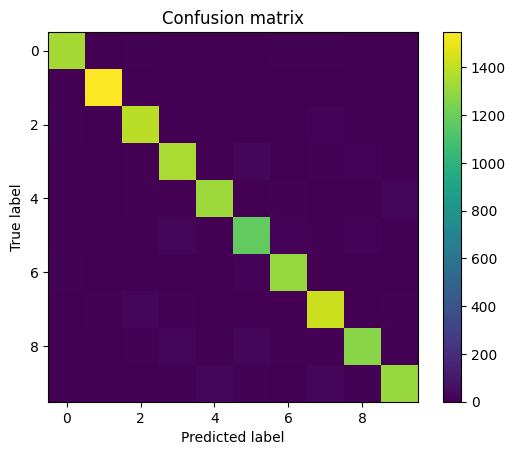

In [24]:
def DisplayConfusionMatrix(confusion_matrix: np.ndarray):
    """
    Display a confusion matrix as a heatmap.
    """
    plt.imshow(confusion_matrix, cmap='viridis')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion matrix')
    plt.show()

# compute the confusion matrix
import tensorflow as tf
confusion_matrix = tf.math.confusion_matrix(y_test, predictions, num_classes=10)
confusion_matrix = confusion_matrix.numpy()
DisplayConfusionMatrix(confusion_matrix)

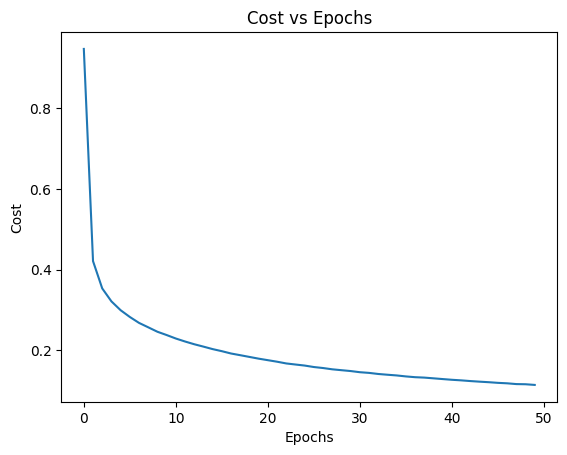

In [25]:
# cost vs epochs
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.show()

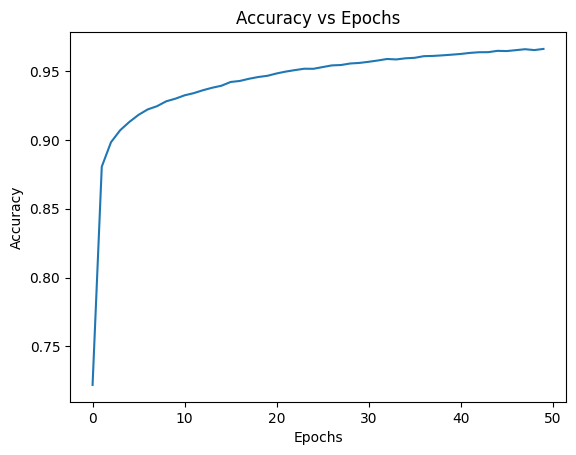

In [26]:
# accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show()

In [28]:
model.save('savefile.keras', overwrite=True)